Voltage prediction using SOC constant current

In [1]:
import pybamm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn import datasets


In [2]:
def plot_format(xlabel,ylabel,title):
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.title(title,color="white")
    plt.xlabel(xlabel,color="white")
    plt.ylabel(ylabel,color="white")

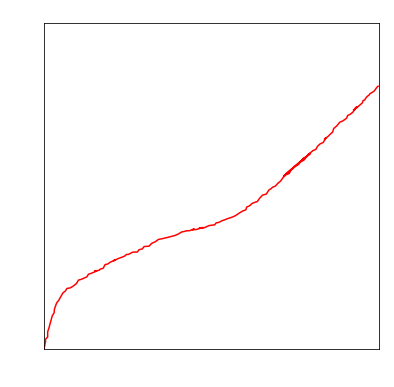

In [3]:
# fetching the dataset from online reference for OCV and state of charge
x = [0,0.214133558174456, 0.32119829513272324, 0.42826711634890824, 0.42826711634890824, 1.0706637066143547, 1.0706637066143547, 1.0706637066143547, 1.4989308229632667, 1.713064381137719, 2.2483962344448982, 1.927193855054261, 2.4625257083614405, 2.997857561668616, 3.1049263828848046, 3.5331894149757987, 3.747322973150251, 4.389723647673615, 5.032120237939062, 5.246253796113518, 5.674516828204513, 6.316917502727876, 6.852249356035052, 7.7087795044749585, 8.565309652914864, 9.635973359529219, 10.278374034052584, 11.134904182492482, 11.884369593974117, 12.740899742414017, 13.2762315957212, 14.025697007202828, 15.738761388340558, 15.096360713817193, 16.488222715564273, 16.809425094954907, 17.6659511591369, 18.201283012444083, 19.057817245141894, 19.700213835407347, 21.413274132287153, 20.770877542021704, 22.269808364984968, 22.912204955250417, 23.55460154551587, 24.08993339882305, 24.625265252130227, 25.1605971054374, 26.552463191442396, 26.76659266535894, 27.837256371973304, 28.372588225280474, 29.336187194936567, 29.871519048243744, 31.370449871207008, 32.11991119843073, 33.19057490504508, 34.15417387470117, 35.331902318273805, 36.830833141237065, 38.115626321767955, 39.07922529142405, 40.149888998038406, 41.113487967694496, 41.75588455795995, 42.61241879065776, 43.36188011788148, 44.86081094084474, 44.32547908753757, 45.396142794151935, 47.002138354073466, 47.53747020738065, 46.359741763808024, 47.965737323729556, 48.50106917703674, 49.25053050426046, 50.00000000000001, 50.96359080114026, 51.39185791748916, 52.14132741322872, 52.89078874045243, 53.31905585680135, 53.747322973150254, 54.60384903733224, 55.6745127439466, 56.63811171360269, 57.280508303868146, 58.3511720104825, 59.31477098013858, 60.27836994979467, 60.49249942371121, 61.34903365640903, 62.098494983632754, 62.95502921633056, 63.70449054355428, 64.34688713381973, 65.20342136651755, 66.38114981009018, 67.13061930582973, 67.88008063305345, 68.20128301244408, 69.05780907662607, 69.80727857236563, 70.66380463654761, 71.41327413228716, 72.26980019646915, 73.23339916612522, 73.66166628247414, 74.51819234665614, 75.05352419996332, 76.0171231696194, 76.55245502292658, 77.62311872954095, 78.47965296223875, 79.55031666885311, 79.33617902642074, 78.80084717311357, 78.26551531980638, 77.51605399258266, 76.76659266535894, 73.55460154551588, 72.37686493342741, 71.52033886924544, 80.29977799607683, 81.15631222877464, 81.69164408208182, 82.44110540930555, 82.97643726261272, 83.40470437896164, 84.26123044314362, 83.72590675835227, 84.68950572800836, 85.65309652914863, 86.1884283824558, 86.50963076184644, 87.36616499454426, 88.32975579568452, 89.18629002838233, 90.36402664047078, 90.68521268282979, 91.43469034708514, 92.18415167430886, 93.46894485483976, 93.04068590700669, 92.71948352761603, 92.39828114822541, 93.46894485483976, 94.64668146692821, 95.0749404147613, 95.28906988867782, 95.71734517354255, 95.93147464745911, 96.25267702684977, 96.78800888015694, 97.00213835407348, 97.32334073346411, 98.28693153460438, 98.50106100852089, 99.57172471513528, 99.78585418905179]
y = [3.3,3.312413793103448, 3.3173793292867724, 3.3223447707603717, 3.3297931223902206, 3.3372413793103446, 3.3471723569672682, 3.3533792535189924, 3.3670345017005654, 3.375724118989089, 3.3955861690126614, 3.383172375909213, 3.4042758810109106, 3.412965498299434, 3.425379291402882, 3.4377930845063305, 3.443999981058055, 3.452689598346579, 3.465103391450027, 3.4688275672649516, 3.4762758241850755, 3.4812413603684, 3.489930977656923, 3.4911724327350484, 3.4961378742086477, 3.5048275862068965, 3.516000018941945, 3.5184827396787446, 3.522206915493669, 3.5259310439537312, 3.5346206612422546, 3.537103429333917, 3.5445517336089036, 3.5445517336089036, 3.547034454345703, 3.5507586301606278, 3.553241350897427, 3.5644136889227505, 3.5668965517241378, 3.5718620405526, 3.580551705195986, 3.5768274820261987, 3.584275833656048, 3.58675860174771, 3.589241275129647, 3.5917241379310343, 3.5966896267594963, 3.5966896267594963, 3.6041379310344825, 3.6041379310344825, 3.6041379310344825, 3.6115861879546065, 3.6140688613365435, 3.621517212966393, 3.6227586206896554, 3.6314482853330414, 3.636413774161503, 3.6438620784364897, 3.6463447991732894, 3.650068974988214, 3.653793103448276, 3.656275871539938, 3.6612413603683995, 3.6674482569201237, 3.668689664643386, 3.671172385380186, 3.671172385380186, 3.676137826853785, 3.6748965611951103, 3.6748965611951103, 3.6798620500235724, 3.6811034577468345, 3.6798620500235724, 3.6811034577468345, 3.683586178483634, 3.6873103542985586, 3.6885517146669584, 3.6897930750353582, 3.6959999715870824, 3.697241379310345, 3.7009655077704067, 3.703448275862069, 3.704689636230469, 3.7084137646905306, 3.712137940505455, 3.7158620689655173, 3.7195861974255795, 3.727034454345703, 3.733241350897427, 3.736965526712352, 3.7456551440008754, 3.7493793198158003, 3.7568275767359243, 3.760551705195986, 3.7630344732876484, 3.7729654982994343, 3.78289652331122, 3.786620699126145, 3.7990344922295933, 3.803999981058055, 3.8077241095181167, 3.8114482853330416, 3.8201379026215654, 3.8275862068965516, 3.8387585922767378, 3.8474482569201243, 3.851172385380186, 3.8611034577468346, 3.8685517146669586, 3.873517250850283, 3.879724147402007, 3.887172404322131, 3.893379300873855, 3.9045517336089035, 3.9132413508974273, 3.91448275862069, 3.9082758620689657, 3.9033103258856414, 3.899586197425579, 3.890896532782193, 3.8623448181152344, 3.851172385380186, 3.8424827680916622, 3.9231723995866448, 3.926896551724138, 3.936827576735924, 3.944275809978617, 3.9467586254251414, 3.9492413698393722, 3.964137931034483, 3.9591724185285897, 3.9666206754487137, 3.976551724137931, 3.9815171892889616, 3.992689645701441, 4.000137878944134, 4.012551672047582, 4.016275847862507, 4.0249654651510305, 4.033655153471848, 4.037379258254479, 4.043586154806203, 4.0609655077704065, 4.058482739678745, 4.051034482758621, 4.051034482758621, 4.058482739678745, 4.0696551724137935, 4.073379300873855, 4.080827534116548, 4.082068965517242, 4.085793093977303, 4.090758606483196, 4.095724142666521, 4.09696550303492, 4.101931039218245, 4.108137935769969, 4.109379296138369, 4.12427585733348, 4.125517241379311]
x=[x[i]/100 for i in range(len(x))]

plt.figure(figsize=(6, 6))
plt.plot(x,y,color="red")
plt.xlim(min(x), 1)
plt.ylim(min(y), max(y)+0.2)
x_ticks = np.arange(min(x), max(x) + 0.1, 0.1)  # Define x-axis ticks at intervals of 0.1
y_ticks = np.arange(min(y), max(y) + 0.1, 0.1)  # Define y-axis ticks at intervals of 0.05

plt.xticks(x_ticks)
plt.yticks(y_ticks)
plot_format("State of Charge (%)","Open Circuit Voltage [V]","ocv vs soc")



In [4]:

# some of the essential functions
def RMSE(True_Voltage,Model_Voltage):
    ans=0
    for i in range(len(True_Voltage)):
        ans+=(True_Voltage[i]-Model_Voltage[i])**2
    ans=ans/len(True_Voltage)
    return math.sqrt(ans)
def RER(RMSE_SPMT,RMSE_Hybrid):
    return ((RMSE_SPMT-RMSE_Hybrid)/RMSE_SPMT)*100

#Current function used for the using current as a function of time
def my_current(t):
    return pybamm.sin(2 * np.pi * t / 60)

In [ ]:
# SPMT MODEL SETUP

 
options = {"thermal":"x-full"}
model = pybamm.lithium_ion.SPMe(options=options) # loading in options
parameter_values = pybamm.ParameterValues("Marquis2019")
# parameter_values=model.default_parameter_values
# parameter_values['Upper voltage cut-off [V]']=3.3
# parameter_values['Cell volume [m3]']=525.9e-06
# print(parameter_values['Lower voltage cut-off [V]'])
# print(parameter_values['Nominal cell capacity [A.h]'])
# print(parameter_values['Current function [A]'])

parameter=dict(parameter_values)
# p=[]
# for j in parameter:
#    if j in model.variable_names():
#         p.append(j)
#        for m in p:
#             print(m)
#            print(parameter)
#            model.variable_names()  #All the solution variables

print(parameter_values)
for j in model.variable_names():
    print(j)

In [ ]:
#Generating the data produced by the simulation of a SPMT model 

Data=[]
C_Rate=[0.1,0.3,0.5,1,2,4,6,8,10]
for rate in C_Rate:

    sim = pybamm.Simulation(model,parameter_values=parameter_values,C_rate=rate)
    t_eval=np.array([i for i in range(0,50000,5)])
#     print(len(t_eval))
    sim.solve(t_eval,initial_soc=1)
    print("Total Number of Data Points for {} :".format(rate),len(sim.solution["Negative electrode SOC"].entries))
    NSOC=sim.solution["Negative electrode SOC"].entries
    Temp=sim.solution["Negative electrode temperature [K]"].entries[-1]
    Voltage=sim.solution["Measured open circuit voltage [V]"].entries

    Exp_OCV=np.interp(NSOC,x,y)

    Data = {'NSOC': NSOC, 'Temp': Temp, 'Voltage': Voltage, 'Exp_OCV': Exp_OCV}
    df = pd.DataFrame(Data)
    df.to_csv(f"C_Rate_{rate}.csv",index=False)

Data1=[]
for i, rate in enumerate(C_Rate):
    filename = f"C_Rate_{rate}.csv"
    df = pd.read_csv(filename)

    NSOC = df['NSOC']
    Voltage = df['Voltage']
    Exp_OCV = df['Exp_OCV']
    Temp=df['Temp']
    for j in range(len(NSOC)):
        Data1.append([NSOC[j],Voltage[j],Exp_OCV[j],Temp[j],rate])
    plt.figure(i+1)  # Create a new figure for each C_Rate
    plt.plot(NSOC, Voltage, color="red", label=f"SPMT_voltage {rate}")
    plt.plot(NSOC, Exp_OCV, color="green", label=f"Exp_voltage {rate} (Interpolated)")
    plot_format("SOC (%)","OCV (V)",f"Graph for C_Rate {rate}")
    plt.legend()
    plt.grid()

plt.show()

df2=pd.DataFrame(Data1,columns=['SOC','SPMT_VOLTAGE','EXP_VOLTAGE','TEMP','C_RATE'])
df2.to_csv(r"HYBRID.csv",index=False) 

In [18]:


#Filtering the data created by SPMT model simulation and creating training and testing datasets

df=pd.read_csv(r"HYBRID.csv")
# df.tail(10)
df['voltage_error']=df['EXP_VOLTAGE']-df['SPMT_VOLTAGE']
cols=[1,2,5]
X=df.drop(df.columns[cols],axis=1)
cols=[0,1,2,3,4]
Y=df.drop(df.columns[cols],axis=1)

sc=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.75,random_state=42)

# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)


x_train.head()

,SOC,TEMP,C_RATE
1842,0.796474,298.919148,0.1
2497,0.742128,299.280709,0.1
201,0.932627,298.228576,0.1
12906,0.687949,303.454430,0.5
3868,0.628377,299.951842,0.1


In [19]:



#Total 2 hidden layers and 1 output layer and forming the neural network 
#Finding the best parameter set for Ann model

def build_model(units=32,reg_lambda=0.001, activation1='relu',activation2='linear',optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, activation=activation1,input_dim=3))
    model.add(Dense(units, activation=activation1,kernel_regularizer=l2(reg_lambda)))
    model.add(Dense(1, activation=activation2))
    model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mean_squared_error'])
    return model


# KerasClassifier wrapper
model = KerasClassifier(build_fn=build_model)

# parameter grid
param_grid = {
    'reg_lambda': [0.001, 0.01, 0.1], 
}


# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error',cv=3,verbose=2)
grid_search.fit(x_train, y_train)


# best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)



<ipython-input-19-aec750203a2d>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
42/42 [==============================] - 0s 730us/step
[CV] END ...................................reg_lambda=0.001; total time=   0.4s
42/42 [==============================] - 0s 851us/step
[CV] END ...................................reg_lambda=0.001; total time=   0.5s
42/42 [==============================] - 0s 730us/step
[CV] END ...................................reg_lambda=0.001; total time=   0.4s
42/42 [==============================] - 0s 633us/step
[CV] END ....................................reg_lambda=0.01; total time=   0.4s
42/42 [==============================] - 0s 804us/step
[CV] END ....................................reg_lambda=0.01; total time=   0.4s


KeyboardInterrupt: 

In [20]:
best_params =  { 'batch_size': 32,'units' : 32}
model = Sequential()
model.add(Dense(32, activation='relu',input_dim=3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
# model=Sequential()
# model.add(Dense(units=32,activation='relu',input_dim=3))
# model.add(Dense(units=32,activation='relu'))
# model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor ="mean_squared_error", 
                                        mode ="min", patience = 30, 
                                        restore_best_weights = True)
model.fit(x_train,y_train,batch_size=32, epochs=4000,shuffle=False)

Epoch 1/4000
126/126 [==============================] - 0s 958us/step - loss: 0.4264 - mean_squared_error: 0.4264
Epoch 2/4000
126/126 [==============================] - 0s 981us/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 3/4000
126/126 [==============================] - 0s 949us/step - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 4/4000
126/126 [==============================] - 0s 981us/step - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 5/4000
126/126 [==============================] - 0s 981us/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 6/4000
126/126 [==============================] - 0s 981us/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 7/4000
126/126 [==============================] - 0s 989us/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 8/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 9/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0136 - mea

126/126 [==============================] - 0s 1ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 74/4000
126/126 [==============================] - 0s 997us/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 75/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 76/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 77/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 78/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 79/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 80/4000
126/126 [==============================] - 0s 989us/step - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 81/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0152 - mean_squared_error: 

126/126 [==============================] - 0s 910us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 145/4000
126/126 [==============================] - 0s 950us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 146/4000
126/126 [==============================] - 0s 950us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 147/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 148/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 149/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 150/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 151/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 152/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0132 

126/126 [==============================] - 0s 981us/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 216/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 217/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 218/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 219/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 220/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 221/4000
126/126 [==============================] - 0s 989us/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 222/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 223/4000
126/126 [==============================] - 0s 958us/step - loss: 0.0105 - mean_s

126/126 [==============================] - 0s 965us/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 287/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 288/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 289/4000
126/126 [==============================] - 0s 933us/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 290/4000
126/126 [==============================] - 0s 965us/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 291/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 292/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 293/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 294/4000
126/126 [==============================] - 0s 949us/step - loss: 0.0091 - me

126/126 [==============================] - 0s 1ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 358/4000
126/126 [==============================] - 0s 966us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 359/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 360/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 361/4000
126/126 [==============================] - 0s 902us/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 362/4000
126/126 [==============================] - 0s 902us/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 363/4000
126/126 [==============================] - 0s 894us/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 364/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 365/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0079 - 

126/126 [==============================] - 0s 902us/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 428/4000
126/126 [==============================] - 0s 902us/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 429/4000
126/126 [==============================] - 0s 893us/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 430/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 431/4000
126/126 [==============================] - 0s 918us/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 432/4000
126/126 [==============================] - 0s 910us/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 433/4000
126/126 [==============================] - 0s 949us/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 434/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 435/4000
126/126 [==============================] - 0s 997us/step - loss: 0.0737 

126/126 [==============================] - 0s 941us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 498/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 499/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 500/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 501/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 502/4000
126/126 [==============================] - 0s 966us/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 503/4000
126/126 [==============================] - 0s 973us/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 504/4000
126/126 [==============================] - 0s 997us/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 505/4000
126/126 [==============================] - 0s 918us/step - loss: 0.0060 - 

Epoch 568/4000
126/126 [==============================] - 0s 918us/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 569/4000
126/126 [==============================] - 0s 981us/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 570/4000
126/126 [==============================] - 0s 973us/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 571/4000
126/126 [==============================] - 0s 997us/step - loss: 0.0063 - mean_squared_error: 0.0063
Epoch 572/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 573/4000
126/126 [==============================] - 0s 910us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 574/4000
126/126 [==============================] - 0s 830us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 575/4000
126/126 [==============================] - 0s 918us/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 576/4000
126/126 [==============================] - 0s 965us/step - 

126/126 [==============================] - 0s 926us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 639/4000
126/126 [==============================] - 0s 902us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 640/4000
126/126 [==============================] - 0s 966us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 641/4000
126/126 [==============================] - 0s 918us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 642/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 643/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 644/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 645/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 646/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0048 - 

126/126 [==============================] - 0s 965us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 709/4000
126/126 [==============================] - 0s 949us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 710/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 711/4000
126/126 [==============================] - 0s 949us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 712/4000
126/126 [==============================] - 0s 902us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 713/4000
126/126 [==============================] - 0s 901us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 714/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 715/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 716/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0043 - 

Epoch 779/4000
126/126 [==============================] - 0s 957us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 780/4000
126/126 [==============================] - 0s 966us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 781/4000
126/126 [==============================] - 0s 973us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 782/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 783/4000
126/126 [==============================] - 0s 933us/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 784/4000
126/126 [==============================] - 0s 910us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 785/4000
126/126 [==============================] - 0s 902us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 786/4000
126/126 [==============================] - 0s 910us/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 787/4000
126/126 [==============================] - 0s 926us/step - 

126/126 [==============================] - 0s 950us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 850/4000
126/126 [==============================] - 0s 918us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 851/4000
126/126 [==============================] - 0s 982us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 852/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 853/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 854/4000
126/126 [==============================] - 0s 958us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 855/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 856/4000
126/126 [==============================] - 0s 966us/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 857/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0039 - 

126/126 [==============================] - 0s 989us/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 920/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 921/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 922/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 923/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 924/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 925/4000
126/126 [==============================] - 0s 949us/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 926/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 927/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared

126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 991/4000
126/126 [==============================] - 0s 886us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 992/4000
126/126 [==============================] - 0s 893us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 993/4000
126/126 [==============================] - 0s 910us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 994/4000
126/126 [==============================] - 0s 973us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 995/4000
126/126 [==============================] - 0s 950us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 996/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 997/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 998/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - me

126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1061/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1062/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1063/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1064/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1065/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1066/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1067/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1068/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squ

126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1131/4000
126/126 [==============================] - 0s 997us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1132/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1133/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1134/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1135/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1136/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1137/4000
126/126 [==============================] - 0s 974us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1138/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - me

Epoch 1201/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1202/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1203/4000
126/126 [==============================] - 0s 981us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1204/4000
126/126 [==============================] - 0s 958us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1205/4000
126/126 [==============================] - 0s 878us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1206/4000
126/126 [==============================] - 0s 918us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1207/4000
126/126 [==============================] - 0s 949us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1208/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1209/4000
126/126 [==============================] - 0s 93

126/126 [==============================] - 0s 934us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1272/4000
126/126 [==============================] - 0s 934us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1273/4000
126/126 [==============================] - 0s 981us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1274/4000
126/126 [==============================] - 0s 965us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1275/4000
126/126 [==============================] - 0s 941us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1276/4000
126/126 [==============================] - 0s 910us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1277/4000
126/126 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1278/4000
126/126 [==============================] - 0s 926us/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 1279/4000
126/126 [==============================] - 0s 926us/step - loss: 0

In [12]:
#Updating the data with that of the values of voltage predicted by neural network
p=model.predict(X)
x=[]


502/502 [==============================] - 0s 677us/step


In [13]:
df.head()

,SOC,SPMT_VOLTAGE,EXP_VOLTAGE,TEMP,C_RATE,voltage_error
0,0.949304,4.100000,4.072122,298.150000,0.1,-0.027878
1,0.949221,4.099429,4.072050,298.150285,0.1,-0.027379
2,0.949138,4.099102,4.071978,298.150577,0.1,-0.027124
3,0.949055,4.098846,4.071906,298.150873,0.1,-0.026940
4,0.948972,4.098626,4.071834,298.151173,0.1,-0.026792


In [14]:
# calculating the prediction by adding the error

for h in p:
    x.append(h[0])

df['error_prediction']=x 
df["Hybrid_prediction"]=df['error_prediction']+df['SPMT_VOLTAGE']
df.to_csv(r"C:\Users\hp\Downloads\HYBRID_predictions.csv",index=False)
df=pd.read_csv(r"C:\Users\hp\Downloads\HYBRID_predictions.csv")
df=pd.DataFrame(df)



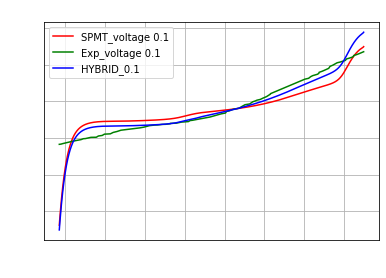

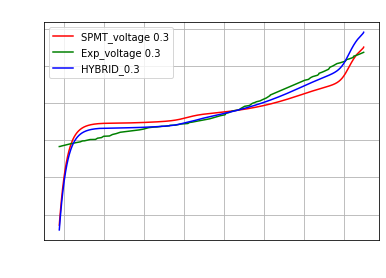

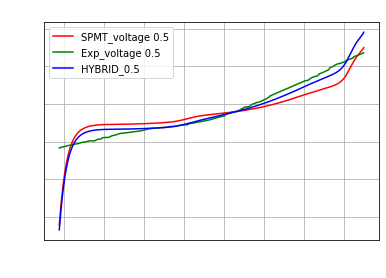

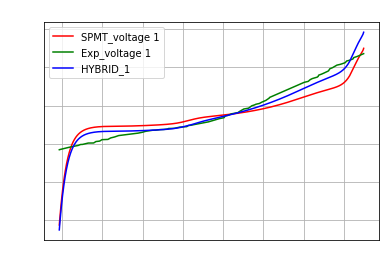

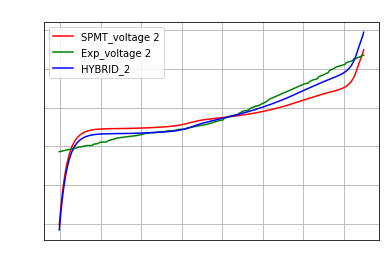

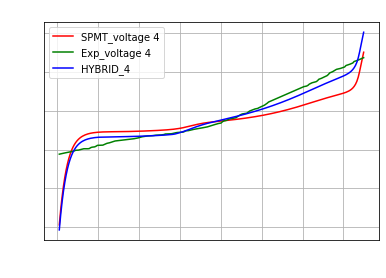

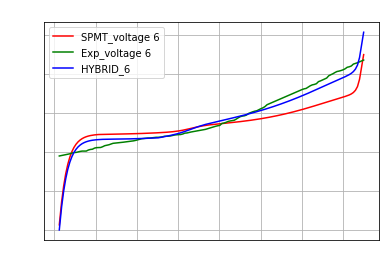

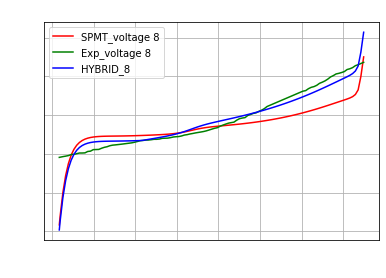

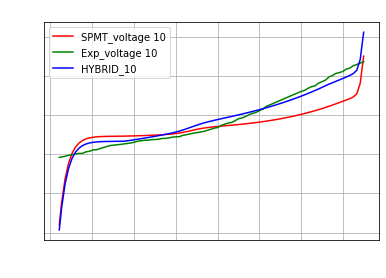

In [15]:
# Visualization

import matplotlib.pyplot as plt
C_Rate=[0.1,0.3,0.5,1,2,4,6,8,10]
RMSE_Hybrid=[]
Exp_OCV=[]
RMSE_Spmt=[]

for i,rate in enumerate(C_Rate):
    Hybrid_1=[]
    Exp_OCV=[]
    Spmt=[]
    Data=[]
    NSOC=[]
    for x in range(len(df['C_RATE'])):
          if df['C_RATE'][x]==rate:
                Exp_OCV.append(df['EXP_VOLTAGE'][x])
                Hybrid_1.append(df['Hybrid_prediction'][x])
                Spmt.append(df['SPMT_VOLTAGE'][x])
                NSOC.append(df['SOC'][x])
    plt.figure(i+1)  # Create a new figure for each C_Rate
    plt.plot(NSOC, Spmt, color="red", label=f"SPMT_voltage {rate}")
    plt.plot(NSOC, Exp_OCV, color="green", label=f"Exp_voltage {rate}")
    plt.plot(NSOC, Hybrid_1, color="blue", label=f"HYBRID_{rate}")
    plot_format("NSOC","Voltage",f"Graph for C_Rate {rate}")
    plt.legend()
    plt.grid()


    RMSE_Hybrid.append(RMSE(Exp_OCV,Hybrid_1))
    RMSE_Spmt.append(RMSE(Exp_OCV,Spmt))

plt.show()

In [16]:
#calculating the rmse and Rer values

for j in range(len(C_Rate)):
    print("C_rate : ",C_Rate[j],"RMSE_Spmt : ",RMSE_Spmt[j],"RMSE_Hybrid : ",RMSE_Hybrid[j],"Rer :",RER(RMSE_Spmt[j],RMSE_Hybrid[j]))

C_rate :  0.1 RMSE_Spmt :  0.06505047137066854 RMSE_Hybrid :  0.0544073768500958 Rer : 16.361287314778387
C_rate :  0.3 RMSE_Spmt :  0.06468323583670266 RMSE_Hybrid :  0.05253517754077059 Rer : 18.78084505017759
C_rate :  0.5 RMSE_Spmt :  0.06490399963162008 RMSE_Hybrid :  0.05143933451310974 Rer : 20.745509051726597
C_rate :  1 RMSE_Spmt :  0.06673562718373564 RMSE_Hybrid :  0.05084547910349992 Rer : 23.810592259045045
C_rate :  2 RMSE_Spmt :  0.07028243896011452 RMSE_Hybrid :  0.05088231166241181 Rer : 27.603093439475444
C_rate :  4 RMSE_Spmt :  0.07877344548760243 RMSE_Hybrid :  0.05649476892301273 Rer : 28.281962819686456
C_rate :  6 RMSE_Spmt :  0.08406132101388208 RMSE_Hybrid :  0.05901232651613175 Rer : 29.798478296116333
C_rate :  8 RMSE_Spmt :  0.08761184956158558 RMSE_Hybrid :  0.06028099975517137 Rer : 31.19538046871428
C_rate :  10 RMSE_Spmt :  0.08941389044697871 RMSE_Hybrid :  0.059215494992550056 Rer : 33.77371827069298


Voltage prediction using soc (varying current)

In [ ]:
options = {"thermal":"x-full"}
model = pybamm.lithium_ion.SPMe(options=options) # loading in options
parameter_values = pybamm.ParameterValues("Marquis2019")
parameter_values['Current function [A]']=my_current


In [ ]:
sim = pybamm.Simulation(model,parameter_values=parameter_values)
t_eval=np.array([i for i in range(0,10001,1)])
sim.solve(t_eval)

In [ ]:
Data=[]
import pandas as pd
NSOC=sim.solution["Negative electrode SOC"].entries
Temp=sim.solution["Negative electrode temperature [K]"].entries[-1]
Voltage=sim.solution["Measured open circuit voltage [V]"].entries

C_Rate=sim.solution["C-rate"].entries 
Current=sim.solution["Current [A]"].entries
Exp_OCV=np.interp(NSOC,x,y)
RMSE_SPMT=RMSE(Exp_OCV,Voltage)

for i in range(len(NSOC)):
    Data.append([C_Rate[i],NSOC[i],Temp[i],Current[i],Voltage[i],Exp_OCV[i]])
df2=pd.DataFrame(Data,columns=['C_RATE','NSOC','TEMP','CURRENT','SPMT_VOLTAGE','Exp_OCV'])
df2.to_csv(r"C:\Users\hp\Downloads\HYBRID_varying.csv",index=False)


In [ ]:


df=pd.read_csv(r"C:\Users\hp\Downloads\HYBRID_varying.csv")
print(df.head())
df['voltage_error']=df['Exp_OCV']-df['SPMT_VOLTAGE']

cols=[0,4,5,6]
X=df.drop(df.columns[cols],axis=1)
cols=[0,1,2,3,4,5]
Y=df.drop(df.columns[cols],axis=1)
# sc=StandardScaler()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

x_train


In [ ]:
grid_search.fit(x_train, y_train)


# best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

In [ ]:
best_params={'activation1': 'relu','activation2': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 50, 'optimizer': 'adam', 'reg_lambda': 0.001, 'units': 64}
model.add(Dense(best_params['units'], activation=best_params['activation1'],input_dim=3,kernel_regularizer=l2(best_params['reg_lambda'])))
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(1, activation=best_params['activation2']))
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
model=Sequential()
model.add(Dense(units=32,activation='relu',input_dim=3))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mean_squared_error'])

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor ="mean_squared_error", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
model.fit(x_train,y_train,batch_size=32, epochs=20,shuffle=False,callbacks=[earlystopping])

In [ ]:
p=model.predict(X)
x=[]

In [ ]:
for h in p:
    x.append(h[0])

df['error_prediction']=x 
df["Hybrid_prediction"]=df['error_prediction']+df['SPMT_VOLTAGE']
RMSE_Hybrid=RMSE(Exp_OCV,df["Hybrid_prediction"])
df.to_csv(r"C:\Users\hp\Downloads\HYBRID_varying.csv",index=False)
print("RMSE_Spmt : ",RMSE_SPMT,"RMSE_Hybrid : ",RMSE_Hybrid,"Rer :",RER(RMSE_SPMT,RMSE_Hybrid))